## **Greenhouse Gas Emissions: A Predictive Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error ,mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import joblib

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore')

## LOAD DATASET

In [ ]:
excel_file = pd.ExcelFile("/content/GHG_Emission_dataset.xlsx")
print(excel_file.sheet_names)
years=range(2010,2017)

['Cover', 'Contents', 'Data Dictionary', 'Sources', 'LCIA Factors of Other GHGs', '2016_Summary_Commodity', '2015_Summary_Commodity', '2014_Summary_Commodity', '2013_Summary_Commodity', '2012_Summary_Commodity', '2011_Summary_Commodity', '2010_Summary_Commodity', '2016_Summary_Industry', '2015_Summary_Industry', '2014_Summary_Industry', '2013_Summary_Industry', '2012_Summary_Industry', '2011_Summary_Industry', '2010_Summary_Industry', '2016_Detail_Commodity', '2015_Detail_Commodity', '2014_Detail_Commodity', '2013_Detail_Commodity', '2012_Detail_Commodity', '2011_Detail_Commodity', '2010_Detail_Commodity', '2016_Detail_Industry', '2015_Detail_Industry', '2014_Detail_Industry', '2013_Detail_Industry', '2012_Detail_Industry', '2011_Detail_Industry', '2010_Detail_Industry', 'Sheet1']


In [ ]:
years[0]

2010

In [ ]:
years[1]

2011

In [ ]:
df_1=pd.read_excel(excel_file,sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [ ]:
df_2=pd.read_excel(excel_file,sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [ ]:
all_data = []

for year in years:
    try:
        # Read the 'Detail_Commodity' sheet
        # Make sure the sheet name is exactly as it appears in your Excel file
        df_com = pd.read_excel("/content/GHG_Emission_dataset.xlsx", sheet_name=f'{year}_Detail_Commodity')

        # Read the 'Detail_Industry' sheet
        df_ind = pd.read_excel("/content/GHG_Emission_dataset.xlsx", sheet_name=f'{year}_Detail_Industry')

        # Add 'Source' column to differentiate data origins
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'

        # Add 'Year' column to both DataFrames
        df_com['Year'] = year
        df_ind['Year'] = year

        # Strip whitespace from column names for consistency
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        # Rename columns for consistency across commodity and industry data
        df_com.rename(columns={'Commodity Code': 'Code', 'Commodity Name': 'Name'}, inplace=True)
        df_ind.rename(columns={'Industry Code': 'Code', 'Industry Name': 'Name'}, inplace=True)

        # Concatenate commodity and industry data for the current year
        # and append to the all_data list
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))


    except Exception as e:
        print(f"An unexpected error occurred while processing year {year}: {e}")

In [ ]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [ ]:
len(all_data)

7

In [ ]:
df=pd.concat(all_data,ignore_index=True)
df.head(11)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010
5,1111B0,"Fresh wheat, corn, rice, and other grains",methane,"kg/2018 USD, purchaser price",0.008,0.001,0.009,NaN,2,3,1,1,1,Commodity,2010
6,1111B0,"Fresh wheat, corn, rice, and other grains",nitrous oxide,"kg/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,3,1,4,1,Commodity,2010
7,1111B0,"Fresh wheat, corn, rice, and other grains",other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,3,1,3,1,Commodity,2010
8,111200,"Fresh vegetables, melons, and potatoes",carbon dioxide,"kg/2018 USD, purchaser price",0.183,0.132,0.315,NaN,3,3,1,4,1,Commodity,2010
9,111200,"Fresh vegetables, melons, and potatoes",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010


In [ ]:
#shape
df.shape

(22092, 15)

In [ ]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

In [ ]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
#finding missing value
df.isnull().sum()/df.shape[0]*100

,0
Code,0.0
Name,0.0
Substance,0.0
Unit,0.0
Supply Chain Emission Factors without Margins,0.0
Margins of Supply Chain Emission Factors,0.0
Supply Chain Emission Factors with Margins,0.0
Unnamed: 7,100.0
DQ ReliabilityScore of Factors without Margins,0.0
DQ TemporalCorrelation of Factors without Margins,0.0


In [ ]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#identifiying garbage values
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("")


Code
814000    56
1111A0    56
1111B0    56
111200    56
111300    56
          ..
211000    56
115000    56
114000    56
113000    56
331314    28
Name: count, Length: 395, dtype: int64

Name
Other support activities for mining                                         56
Multifamily residential structures                                          56
Other residential structures                                                56
Soybean and other oilseed processing                                        56
Full-service restaurants                                                    56
                                                                            ..
Copper, nickel, lead, and zinc                                              28
Iron, gold, silver, and other metal ores                                    28
Dimensional stone                                                           28
Commercial and industrial machinery and equipment repair and maintenance    28
Personal and hous

## Data Preprocessing

In [ ]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Code,22092,395,814000,56
Name,22092,713,Other support activities for mining,56
Substance,22092,4,carbon dioxide,5523
Unit,22092,2,"kg/2018 USD, purchaser price",16569
Source,22092,2,Industry,11060


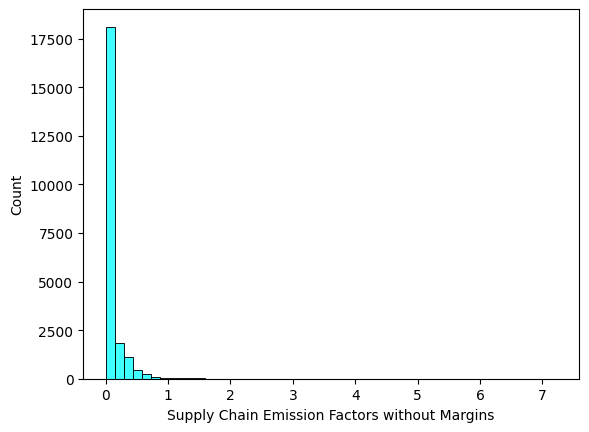

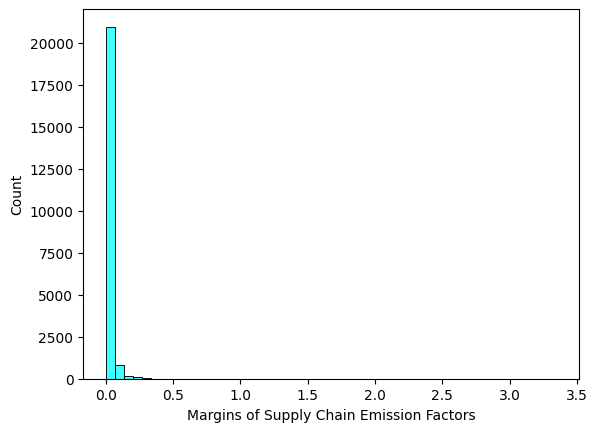

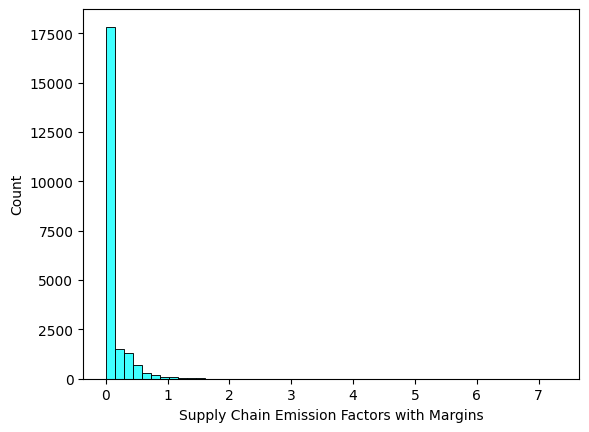

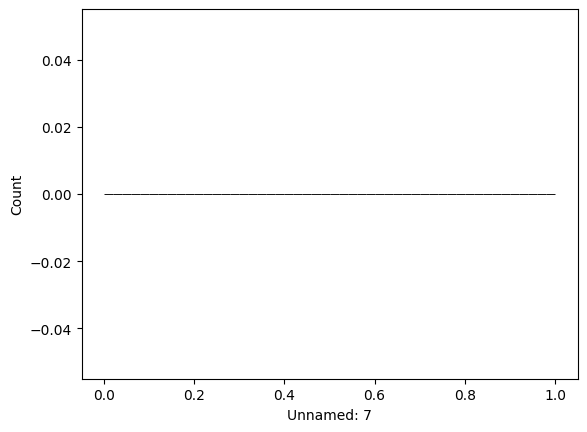

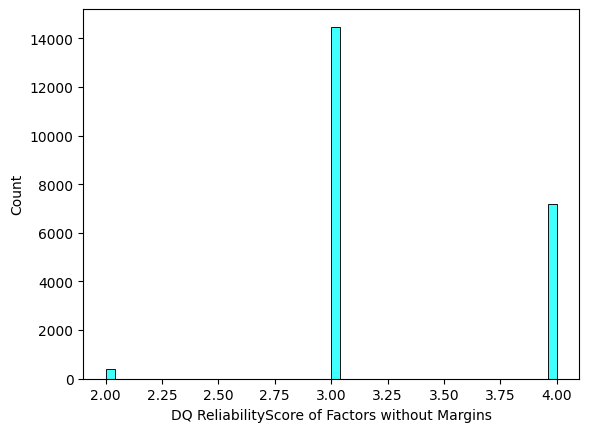

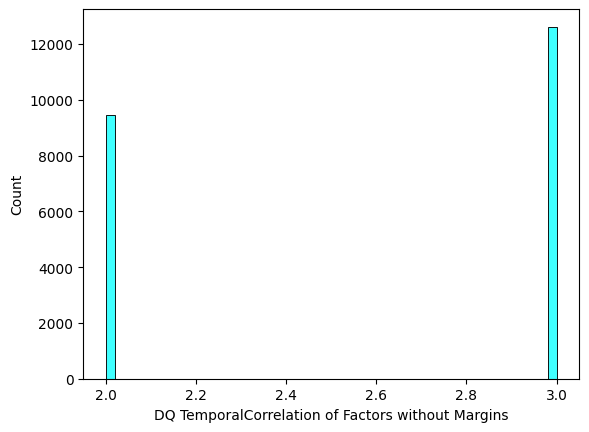

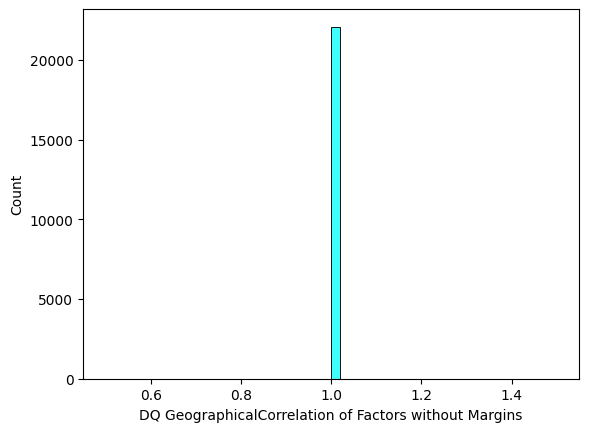

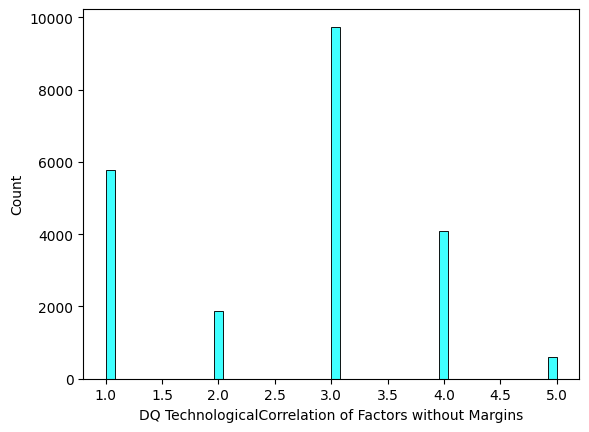

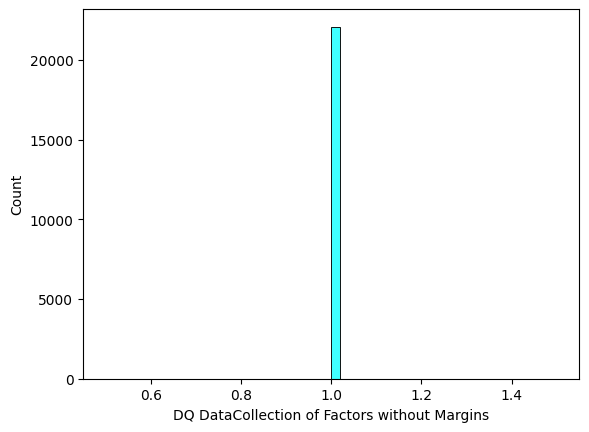

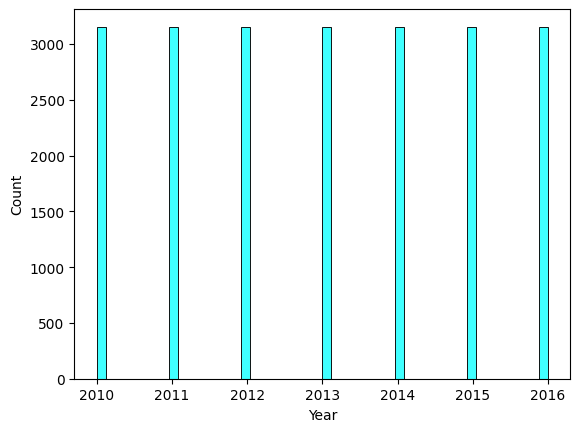

In [ ]:
#histrogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,color='aqua',bins=50)
  plt.show()


In [ ]:
# Check caterical value
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [ ]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [ ]:
# Checking unique values in 'Unit'
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [ ]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [ ]:
print(df['Source'].unique())

['Commodity' 'Industry']


In [ ]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [ ]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [ ]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [ ]:
len(df.Name.unique())

713

## Top 10 Emmiting Industry

In [ ]:
top_emitters=df[['Name','Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values('Supply Chain Emission Factors with Margins',ascending=False).head(10)

# Resetting index for betterplotting
top_emitters=top_emitters.reset_index()
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


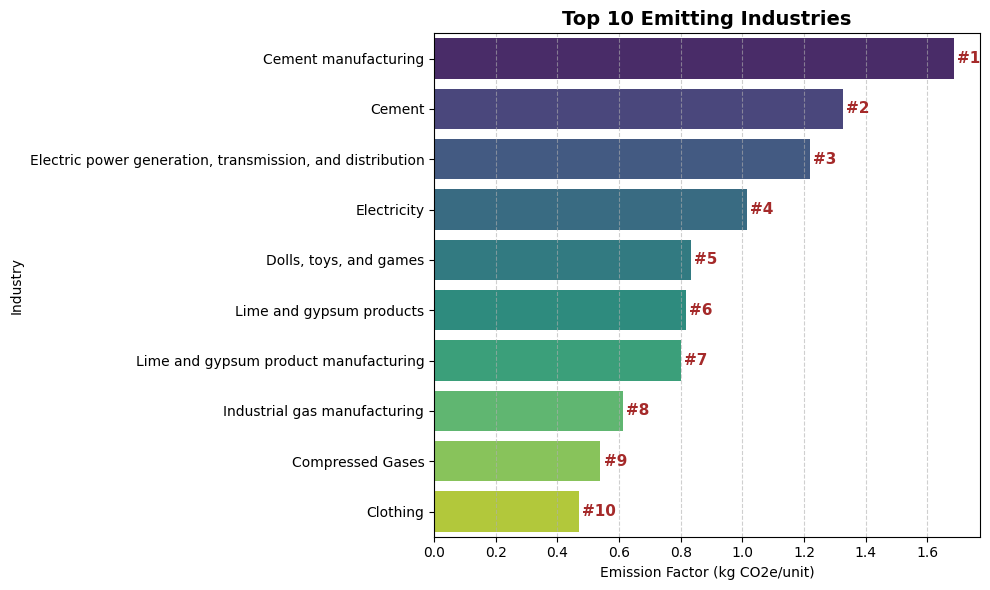

In [ ]:
plt.figure(figsize=(10, 6))

# Barplot for top emitting industries
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    palette='viridis'  # Corrected palette name
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters['Name']), start=1):
    plt.text(
        x=value + 0.01,  # slightly offset to the right of the bar
        y=i - 1,         # match the y position of the bar
        s=f'#{i}',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='brown'
    )

# Title and axis labels
plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold')
plt.xlabel('Emission Factor (kg CO2e/unit)')
plt.ylabel('Industry')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Prevent overlap
plt.tight_layout()

# Show plot
plt.show()


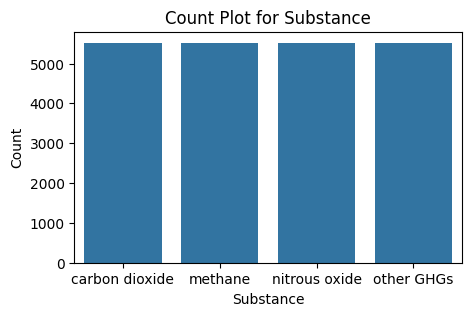

In [ ]:
# Count plot for Substance
plt.figure(figsize=(5,3))
sns.countplot(x=df['Substance'])
plt.title('Count Plot for Substance')
plt.xlabel('Substance')
plt.ylabel('Count')
plt.show()


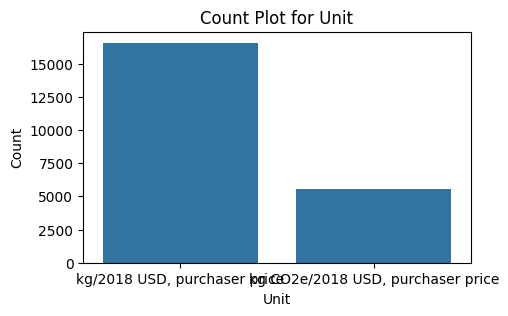

In [ ]:
# Count plot for Unit
plt.figure(figsize=(5,3))
sns.countplot(x=df['Unit'])
plt.title('Count Plot for Unit')
plt.xlabel('Unit')
plt.ylabel('Count')
plt.show()


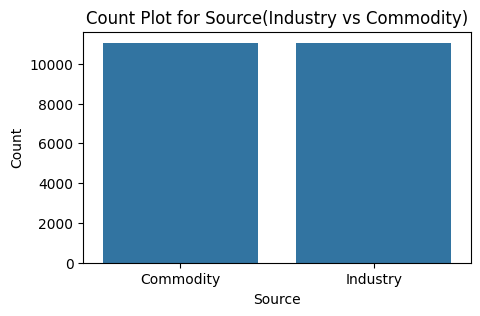

In [ ]:
# Count plot for Source
plt.figure(figsize=(5,3))
sns.countplot(x=df['Source'])
plt.title('Count Plot for Source(Industry vs Commodity)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()


## Box Plot Analysis of [Variable Name]

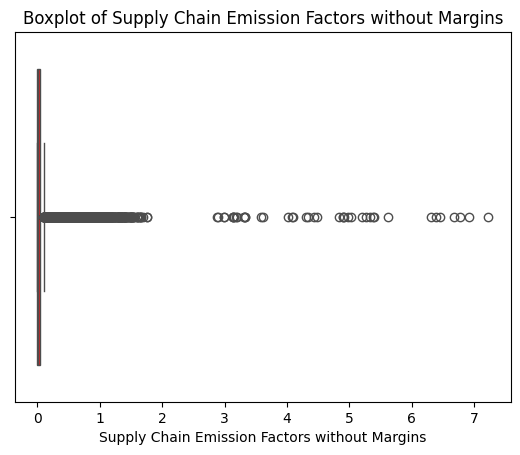

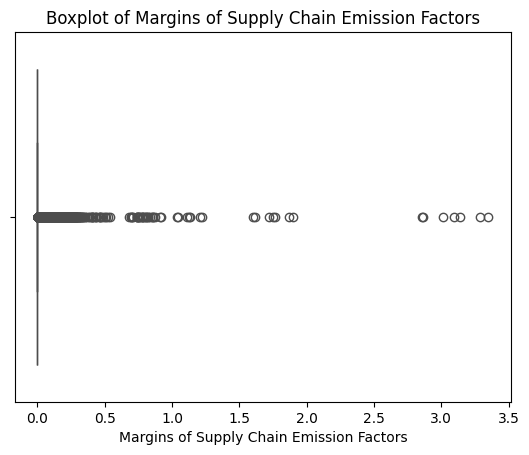

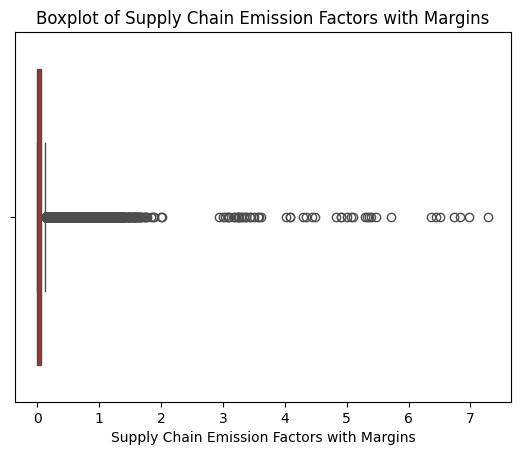

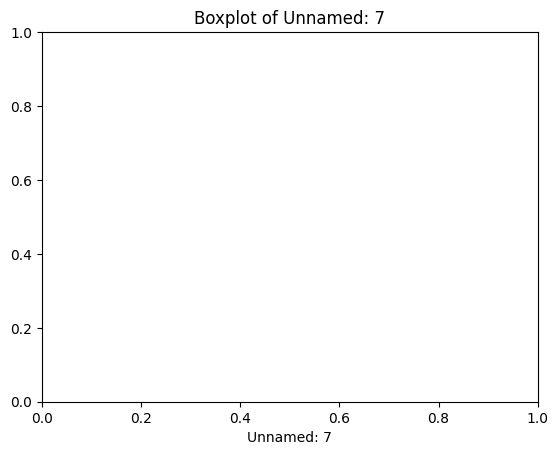

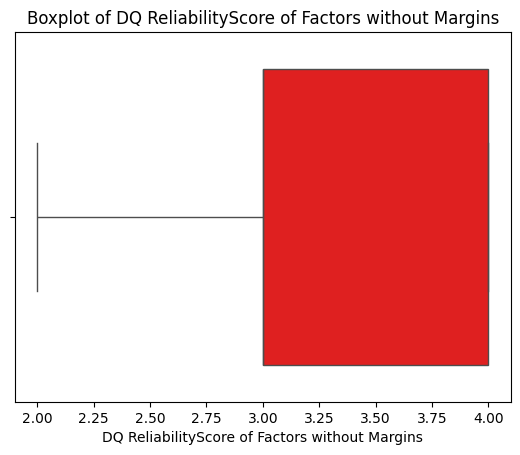

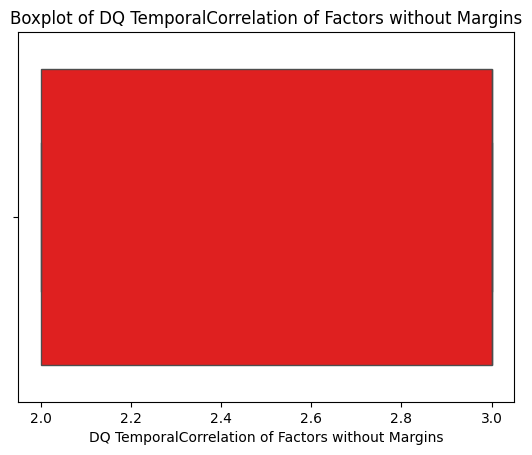

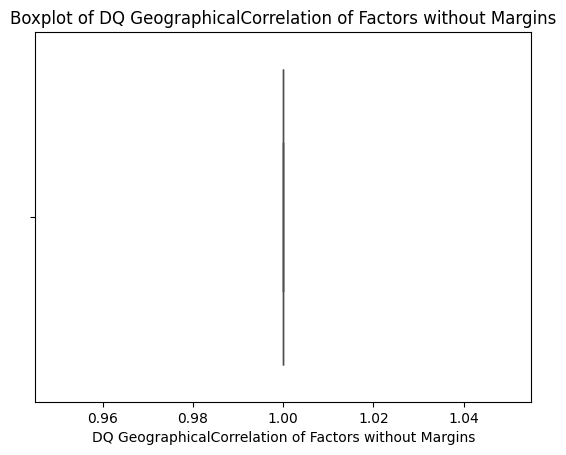

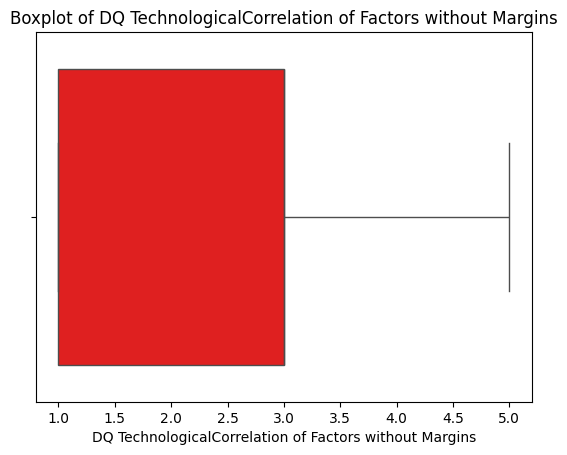

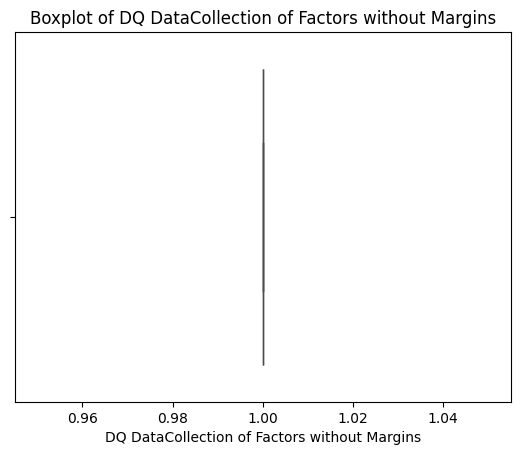

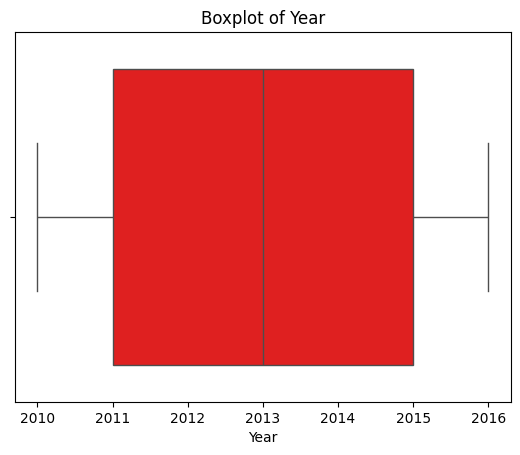

In [ ]:
#Boxplot -to-identify Outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(x=df[i].dropna(), color='red')
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()



In [ ]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

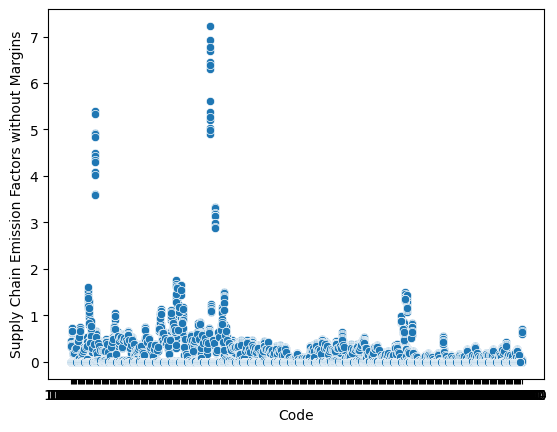

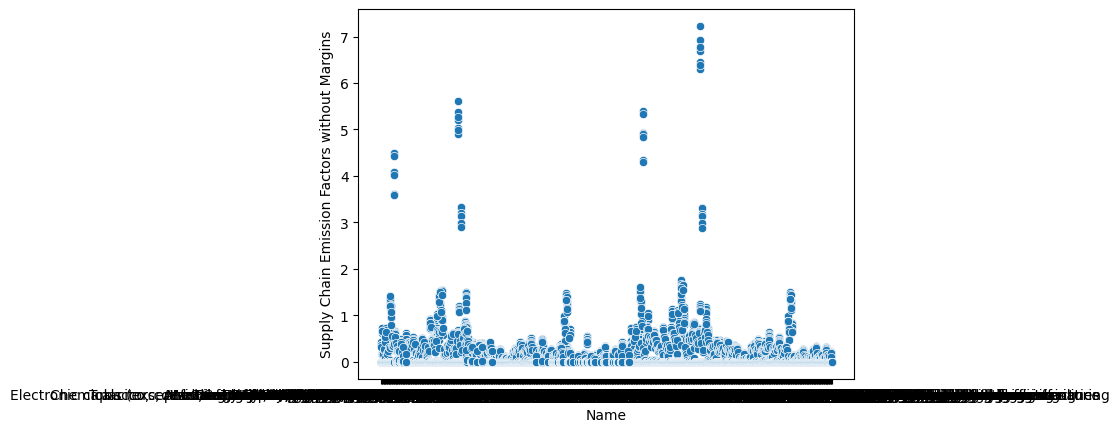

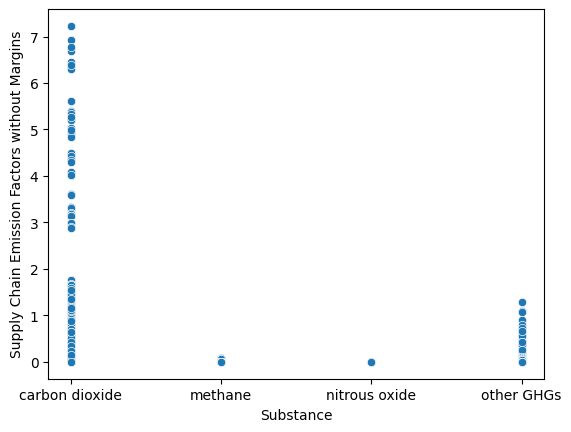

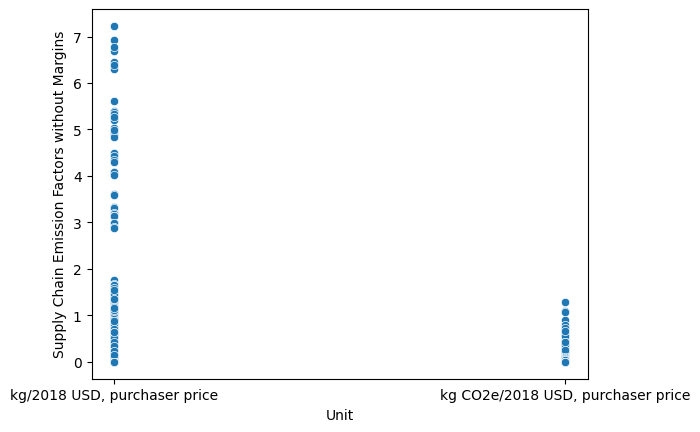

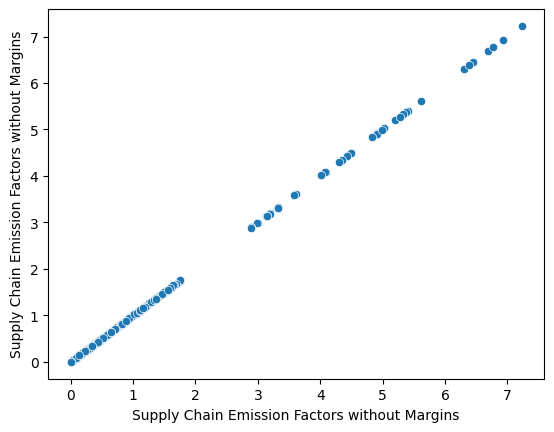

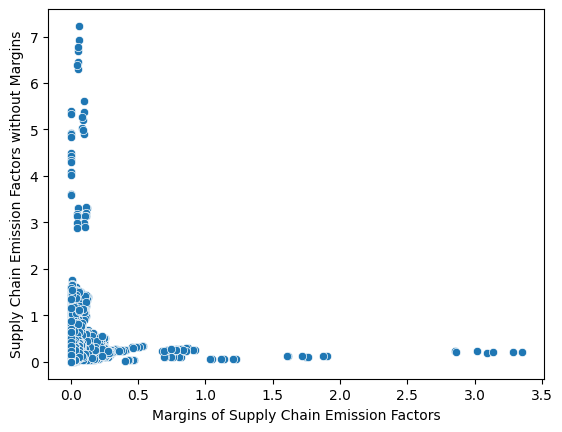

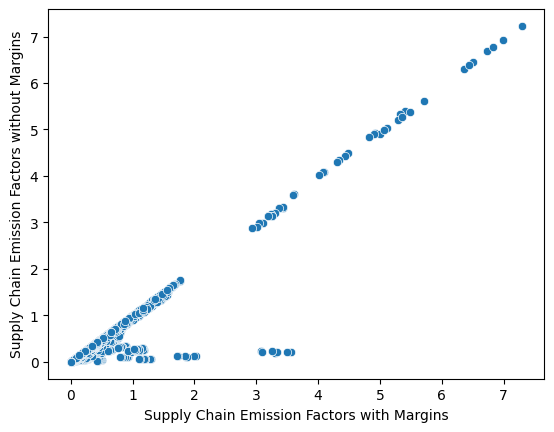

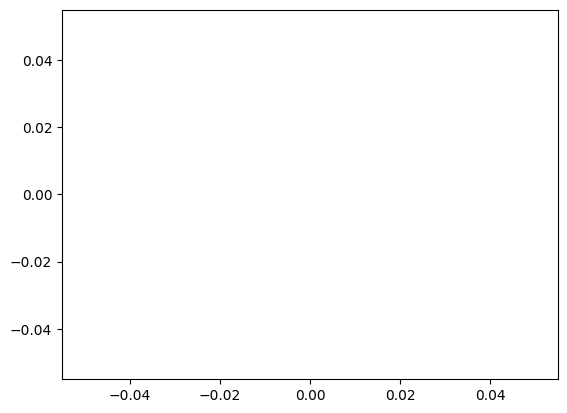

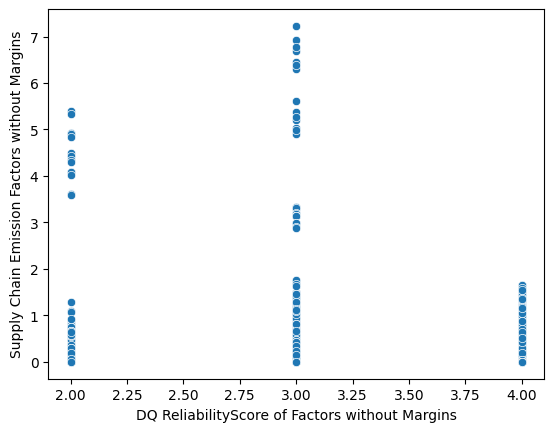

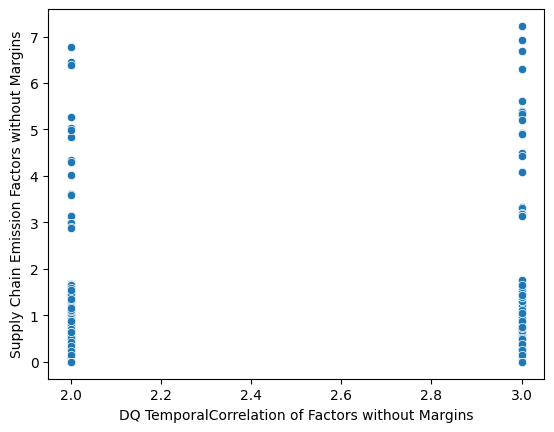

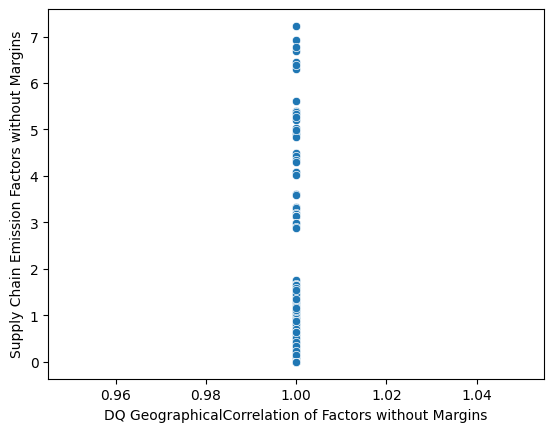

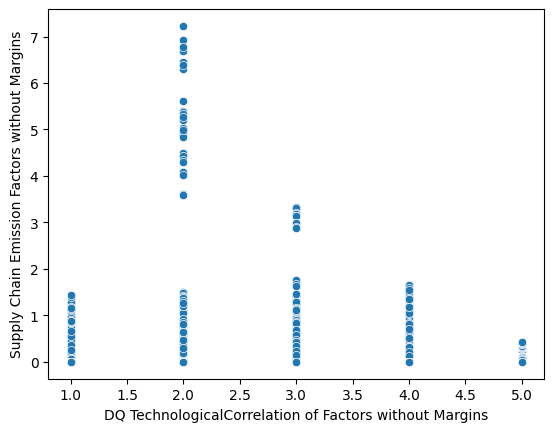

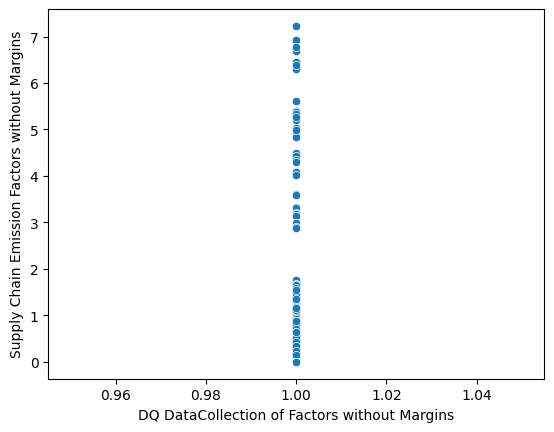

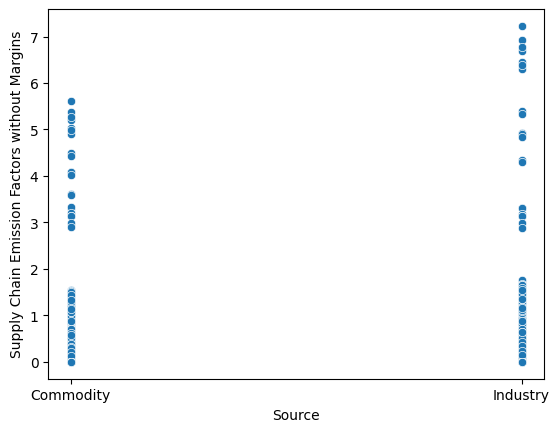

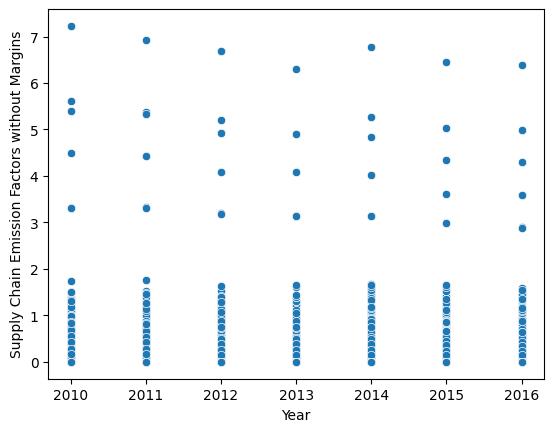

In [ ]:
#Scatter plot to understand the relationship
for i in ['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year']:
       sns.scatterplot(data=df,x=i,y='Supply Chain Emission Factors without Margins')
       plt.show()


## Multivariate Analysis

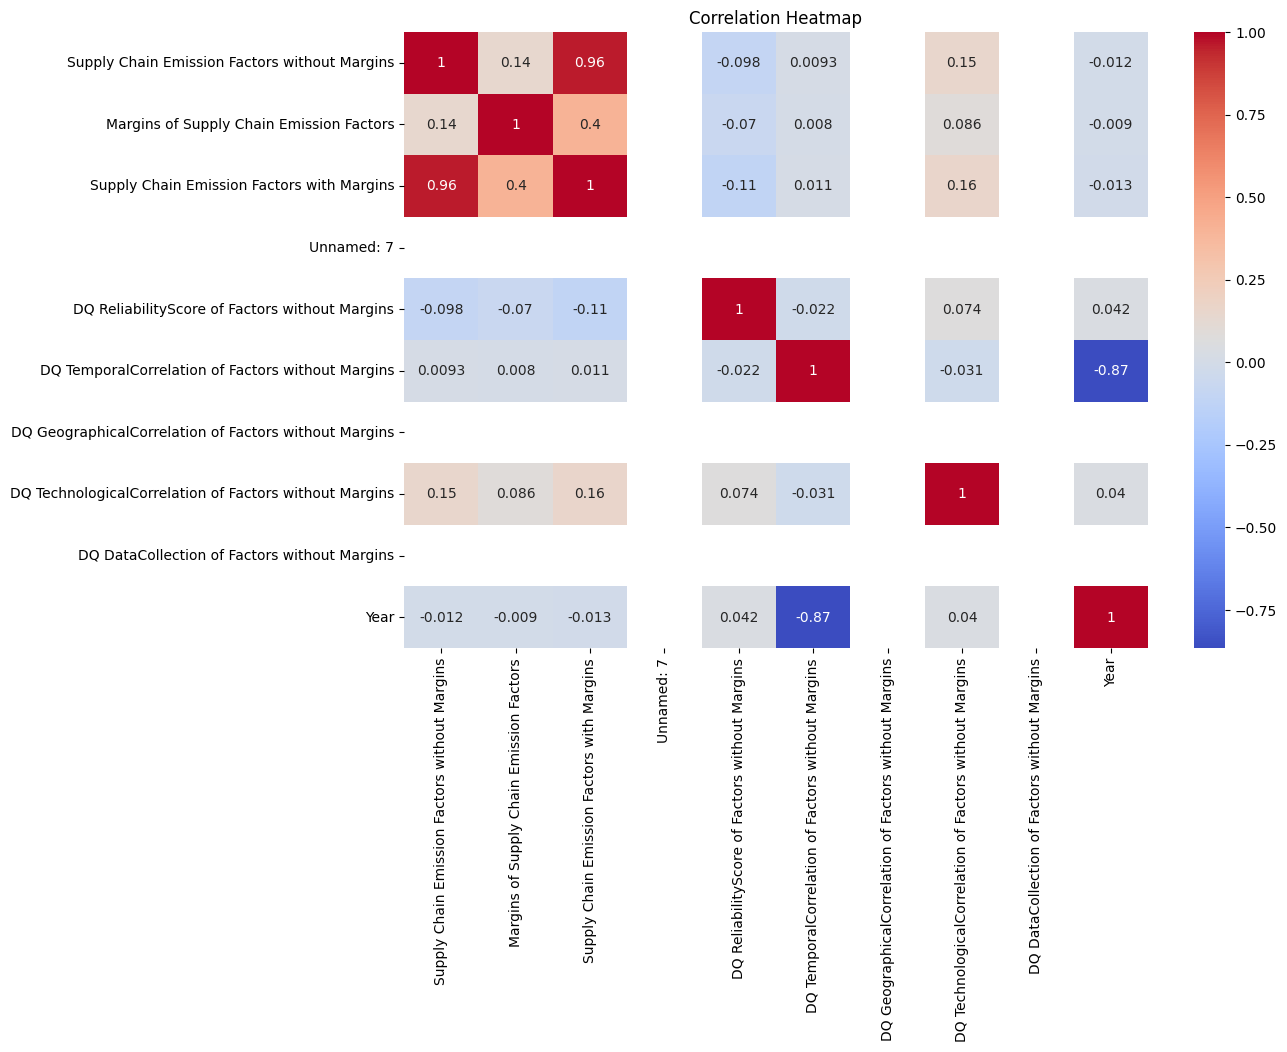

In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Missing value treatments

In [ ]:
#choose the method inputing missing value
#like mean,median,mode or KNNIputer

for col in df.select_dtypes(include='object').columns:
    mode_value = df[col].mode()[0]  # Get the most frequent value
    df[col] = df[col].fillna(mode_value)

In [ ]:
impute=KNNImputer()
# Create an imputer for categorical columns
imputer = SimpleImputer(strategy='most_frequent')

# Loop through object columns
for col in df.select_dtypes(include="object").columns:
    df[col] = imputer.fit_transform(df[[col]]).ravel()


## Outliers treatments

In [ ]:
#decide whether to do outliers treaments or not,if do how?

In [ ]:
def wisker(df, col, method='detect', verbose=True):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    if verbose:
        print(f"Column: {col}")
        print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
        print(f"Outliers count: {outliers.shape[0]}\n")

    if method == 'cap':
        df[col] = np.where(df[col] < lower, lower,
                  np.where(df[col] > upper, upper, df[col]))
        return df

In [ ]:
wisker(df, 'Supply Chain Emission Factors without Margins')

Column: Supply Chain Emission Factors without Margins
Lower bound: -0.07, Upper bound: 0.11
Outliers count: 4457



In [ ]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

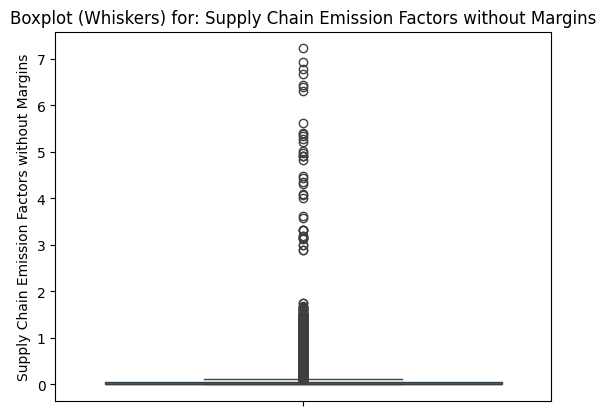

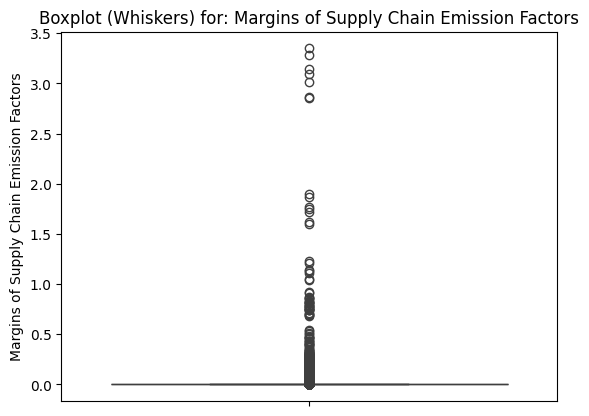

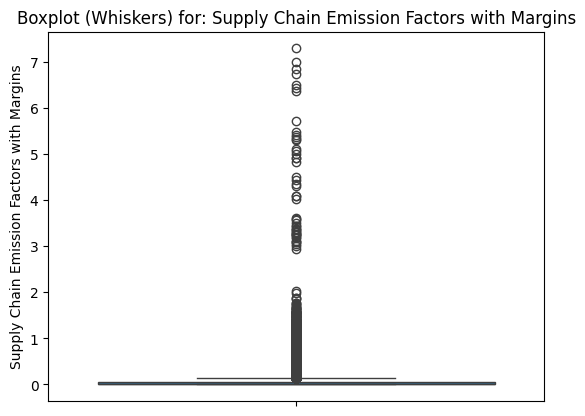

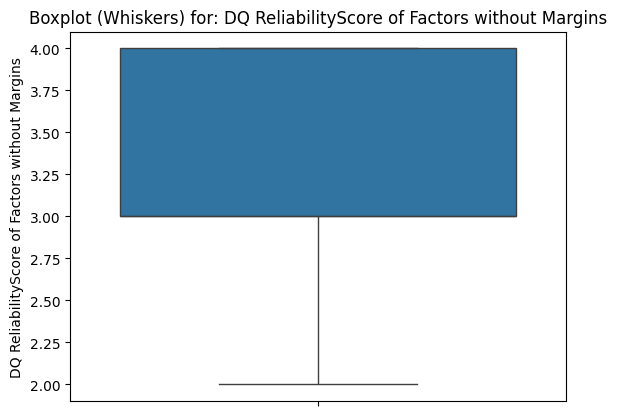

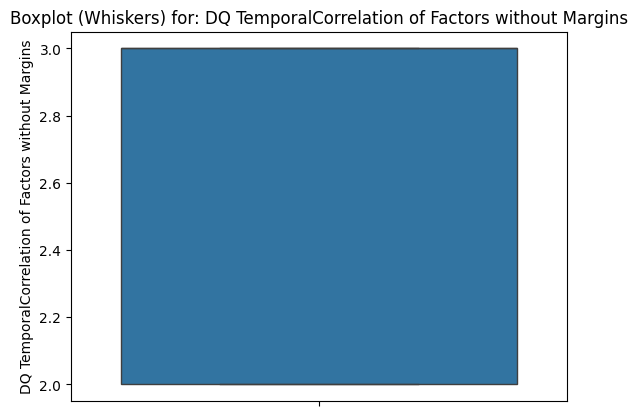

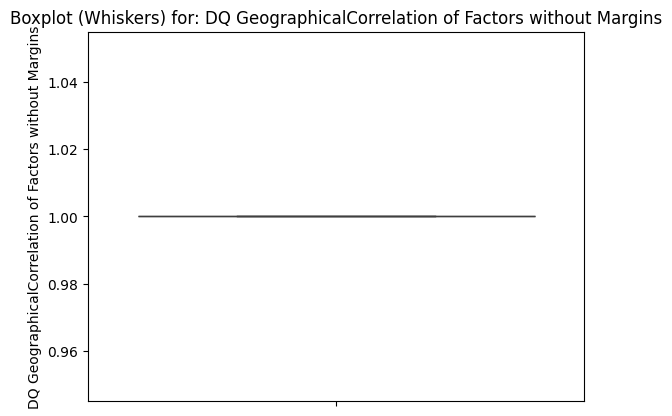

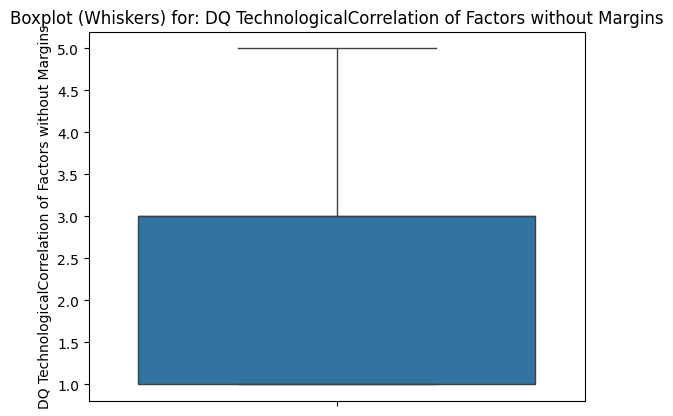

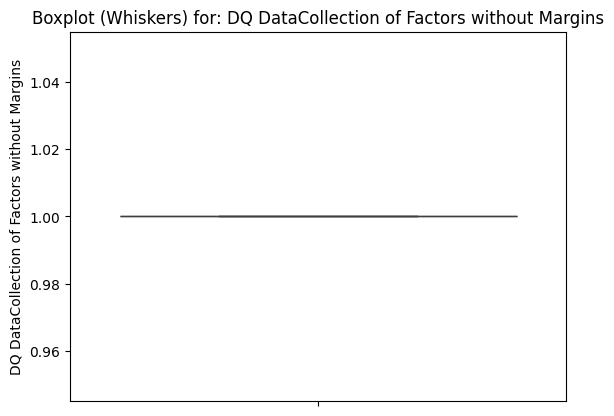

In [ ]:
columns_for_whiskers = [
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors',
    'Supply Chain Emission Factors with Margins',
    'DQ ReliabilityScore of Factors without Margins',
    'DQ TemporalCorrelation of Factors without Margins',
    'DQ GeographicalCorrelation of Factors without Margins',
    'DQ TechnologicalCorrelation of Factors without Margins',
    'DQ DataCollection of Factors without Margins'
]

for col in columns_for_whiskers:
    if col in df.columns:
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot (Whiskers) for: {col}')
        plt.show()


Let's prepare the data for a classification task to generate the `y_test` and `y_pred` variables needed for the confusion matrix. I will use the 'Source' column as the target variable for this example.

In [ ]:
# Drop non-numeric and irrelevant columns for this example
df_for_model = df.drop(['Code', 'Name', 'Substance', 'Unit'], axis=1)

# Handle the 'Unnamed: 7' column if it still exists and has NaNs (although we dropped it earlier, good to be safe)
if 'Unnamed: 7' in df_for_model.columns:
  df_for_model.drop('Unnamed: 7', axis=1, inplace=True)


# Separate features (X) and target (y)
X = df_for_model.drop('Source', axis=1)
y = df_for_model['Source']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increase max_iter if convergence warnings occur
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Now that we have `y_test` and `y_pred`, we can plot the confusion matrix.

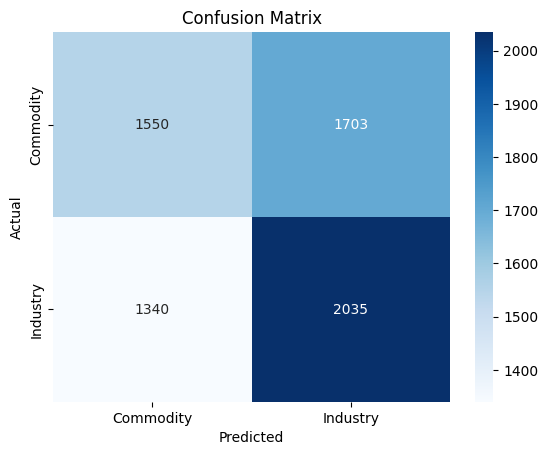

In [ ]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Duplicates and Garbege values

In [ ]:
#check for uplicate if we have any uniquie column in the data set
#clean the garbege value

df.drop_duplicates()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.009,0.000,0.009,NaN,4,2,1,5,1,Industry,2016
22088,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016
22089,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016
22090,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016


## Normalize Features

In [ ]:
# Define features (X) and target (y)
# Drop non-numeric and irrelevant columns for this example
X = df.drop(columns=['Supply Chain Emission Factors with Margins', 'Code', 'Name', 'Substance', 'Unit', 'Unnamed: 7', 'Source'])
y = df['Supply Chain Emission Factors with Margins']

In [ ]:
X.head()

,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year
0,0.398,0.073,4,3,1,4,1,2010
1,0.001,0.001,4,3,1,1,1,2010
2,0.002,0.000,4,3,1,4,1,2010
3,0.002,0.000,3,3,1,3,1,2010
4,0.659,0.081,4,3,1,4,1,2010


In [ ]:
y.head()

,Supply Chain Emission Factors with Margins
0,0.470
1,0.002
2,0.002
3,0.002
4,0.740


In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled[0].min(),X_scaled[0].max()

(np.float64(-1.5), np.float64(1.3849614361966767))

In [ ]:
np.round(X_scaled.mean()),np.round(X_scaled.std())

(np.float64(-0.0), np.float64(1.0))

## Divide the data into train and test

In [ ]:
X.shape

(22092, 8)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(17673, 8)

In [ ]:
X_test.shape

(4419, 8)

## Select the model for training

In [ ]:
# Create the model
RF_model = RandomForestRegressor(random_state=42)

In [ ]:
RF_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

## Prediction and evalution

In [ ]:
# Making prediction on the test set
RF_y_pred=RF_model.predict(X_test)

In [ ]:
RF_y_pred[:40]

array([2.93500000e-01, 1.00000000e-03, 1.16095119e-03, 1.14789522e-03,
       0.00000000e+00, 4.00000000e-03, 1.75474928e-04, 2.22885455e-03,
       2.00000000e-03, 3.93570000e-01, 0.00000000e+00, 1.40000000e-02,
       4.00000000e-03, 7.00000000e-03, 2.22885455e-03, 4.21095077e-04,
       1.04152283e-03, 3.13080000e-01, 9.00000000e-03, 0.00000000e+00,
       5.31340000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.00000000e-03, 3.55360000e-01, 3.00000000e-03, 1.01766175e-03,
       3.52650000e-03, 3.00000000e-03, 2.33270000e-01, 1.00000000e-03,
       0.00000000e+00, 6.73370000e-01, 1.03090662e-03, 0.00000000e+00,
       7.58000000e-03, 6.00000000e-03, 1.80222584e-04, 1.04152283e-03])

In [ ]:
# Calculating meand squared Error(MSE)
RF_mse=mean_squared_error(y_test,RF_y_pred)

# Calculating Root mean squared Error(RMSE)
RF_rmse=np.sqrt(RF_mse)
RF_r2=r2_score(y_test,RF_y_pred)

print(f"MSE: {RF_mse}")
print(f"RMSE: {RF_rmse}")
print(f"R2: {RF_r2}")

MSE: 3.2195345137169155e-05
RMSE: 0.005674094212926778
R2: 0.9994268290049942


In [ ]:
# Initialize Linear Regression model
LR_model = LinearRegression()

# Fit model on training data
LR_model.fit(X_train, y_train)

# Predict on test data
LR_y_pred = LR_model.predict(X_test)

# Calculate metrics
LR_mse = mean_squared_error(y_test, LR_y_pred)        # Mean Squared Error
LR_rmse = np.sqrt(LR_mse)
LR_r2 = r2_score(y_test, LR_y_pred)

# Print metrics
print(f"MSE: {LR_mse}")
print(f"RMSE: {LR_rmse}")
print(f"R2: {LR_r2}")


MSE: 7.881909212445524e-08
RMSE: 0.0002807473813314298
R2: 0.9999985967903973


## Hyperparameter tuning

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform Grid Search with 3-fold Cross-Validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1
)

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Use the best model to make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics
HP_mse = mean_squared_error(y_test, y_pred_best)
HP_rmse = np.sqrt(HP_mse)
HP_r2 = r2_score(y_test, y_pred_best)

# Print metrics
print(f"MSE: {HP_mse}")
print(f"RMSE: {HP_rmse}")
print(f"R2: {HP_r2}")

MSE: 3.2195345137169155e-05
RMSE: 0.005674094212926778
R2: 0.9994268290049942


## Model Accuraccy Comparison: RF vs LR

In [ ]:
# Create a comparative DataFrame for all models
results = {
    'Model': ['Random Forest (Default)', 'Linear Regression', 'Random Forest (Tuned)'],
    'MSE': [RF_mse, LR_mse, HP_mse],
    'RMSE': [RF_rmse, LR_rmse, HP_rmse],
    'R2': [RF_r2, LR_r2, HP_r2]
}

# Convert to DataFrame and display
comparison_df = pd.DataFrame(results)
print(comparison_df)

                     Model           MSE      RMSE        R2
0  Random Forest (Default)  3.219535e-05  0.005674  0.999427
1        Linear Regression  7.881909e-08  0.000281  0.999999
2    Random Forest (Tuned)  3.219535e-05  0.005674  0.999427


In [ ]:
# Create a directory to save the models if if doesn't exist
!mkdir models

In [ ]:
# Save model and encoders
joblib.dump(best_model, 'models/LR_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
!curl -s ipv4.icanhazip.com

34.55.149.103


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.55.149.103:8501

⠏⠋⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://empty-words-travel.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:31761 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙